In [42]:
from matplotlib import pyplot as plt
import numpy as np
from utils.common import Maze, plot_action_values, plot_policy

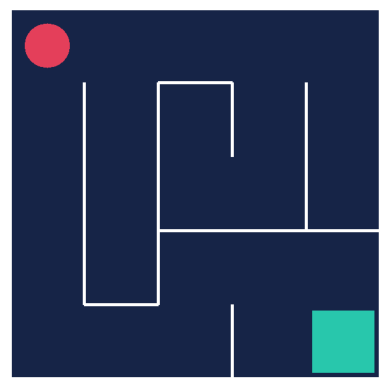

In [43]:
env = Maze()
env.reset()

frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)
plt.show()

In [44]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


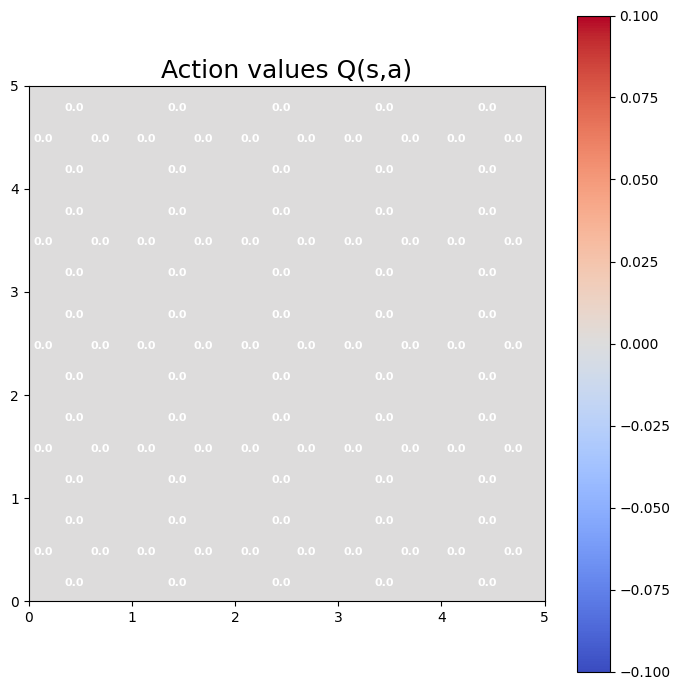

In [45]:
action_values = np.zeros((5,5,4))
plot_action_values(action_values)

In [46]:
def policy(state, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [47]:
action = policy((0, 0), epsilon=0.5)
print(f"Selected action: {action}")

Selected action: 3


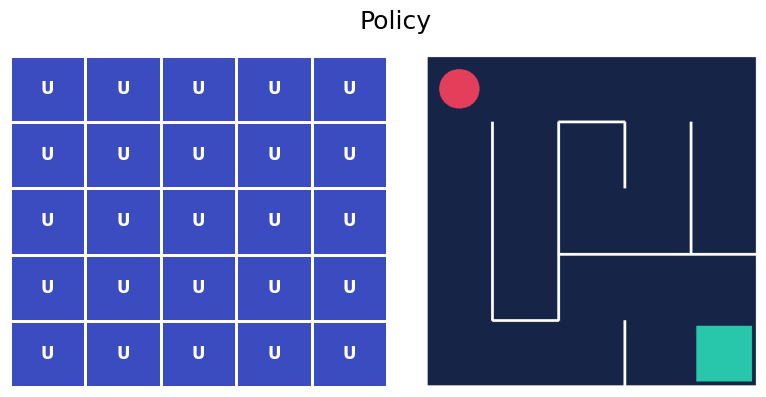

In [48]:
plot_policy(action_values, frame)

In [49]:
def on_policy_mc_control(policy, action_values, episodes, gamma=0.99, epsilon=0.2):
    sa_returns = {}

    for episodes in range(1, episodes + 1):
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append((state, action, reward))
            state = next_state

        G = 0
        for state_t, action_t, reward_t in reversed(transitions):
            G = gamma * G + reward_t

            if (state_t, action_t) not in sa_returns:
                sa_returns[(state_t, action_t)] = []
            sa_returns[(state_t, action_t)].append(G)
            action_values[state_t][action_t] = np.mean(sa_returns[(state_t, action_t)])

In [50]:
on_policy_mc_control(policy, action_values, episodes=100000)

KeyboardInterrupt: 

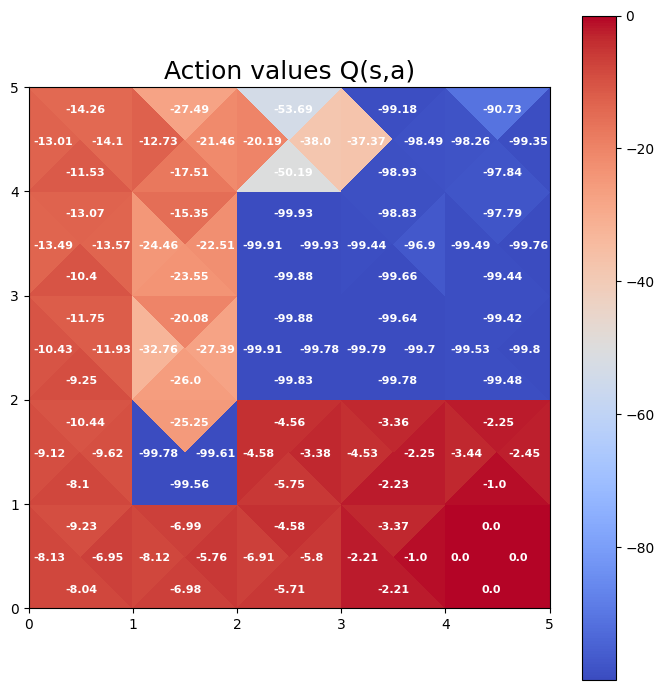

In [41]:
plot_action_values(action_values)